# 1. Data Understanding and Cleaning

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the file from pandas
data = pd.read_csv('./winequalityN.csv')
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            6.7             0.210         0.36            8.55   
1  white            8.0             0.340         0.25            6.40   
2  white            6.5             0.115         0.29            1.95   
3  white            9.2             0.280         0.41            1.00   
4  white            6.9             0.750         0.13            6.30   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.020                 20.0                  86.0  0.99146  3.19   
1      0.035                 38.0                 103.0  0.99148  2.91   
2      0.038                 73.0                 166.0  0.98900  3.12   
3      0.042                 14.0                  59.0  0.99220  2.96   
4      0.036                 19.0                  50.0  0.99312  3.09   

   sulphates  alcohol  quality  
0       0.22     13.4        7  
1       0.23     12.2        6  
2       0.25     12.9        7  
3       0.25     10.5        6  
4       0.25     11.1        4

From the dataset we will be evaluating the quality rating of wine in 4 different class on the basis of their manufacture.

Therefore quality column will be our output and remaining other column will be input.

In [3]:
# checking if there is null value it should be removed for getting better accuracy
# OR we can assign median value to null by using fillna() method from pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6269 non-null   object 
 1   fixed acidity         6260 non-null   float64
 2   volatile acidity      6261 non-null   float64
 3   citric acid           6266 non-null   float64
 4   residual sugar        6267 non-null   float64
 5   chlorides             6267 non-null   float64
 6   free sulfur dioxide   6269 non-null   float64
 7   total sulfur dioxide  6269 non-null   float64
 8   density               6269 non-null   float64
 9   pH                    6260 non-null   float64
 10  sulphates             6265 non-null   float64
 11  alcohol               6269 non-null   float64
 12  quality               6269 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 636.8+ KB


Dimention of dataset is (6269, 13) (entries, columns) 

Our dataset has 1 string column and column fixed acidity(9), volatile acidity(8), citric acid(3), residual sugar(2), chlorides(2), pH(9), sulphates(4) has null value. we should fill it before processing.


We can removing the rows containg null values but for better model we fit null values to mean of each column.

In [4]:
# lets find out how data has been distributed
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6260.000000       6261.000000  6266.000000     6267.000000   
mean        7.224960          0.340375     0.318423        5.448731   
std         1.296547          0.163983     0.146247        4.776478   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.410000     0.390000        8.100000   
max        15.900000          1.330000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6267.000000          6269.000000           6269.000000  6269.000000   
mean      0.056423            30.358032            115.659675     0.994761   
std       0.035172            17.314364             56.549249     0.002976   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992400   
50%       0.048000            29.000000            118.000000     0.994980   
75%       0.066000            41.000000            156.000000     0.997000   
max       0.611000           138.500000            344.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6260.000000  6265.000000  6269.000000  6269.000000  
mean      3.217987     0.531963    10.455237     5.762163  
std       0.160597     0.148359     1.170695     0.771044  
min       2.720000     0.220000     8.000000     4.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.200000     6.000000  
75%       3.320000     0.600000    11.266667     6.000000  
max       4.010000     2.000000    14.900000     7.000000

## 1.1 removing duplicate data

In [5]:
duplicate = data[data.duplicated()]
duplicate.shape

(1124, 13)

In [6]:
data = data.drop_duplicates()
data.shape

(5145, 13)

## 1.2 Handaling null value

In [7]:
# get the number of missing data points per column
missing_column = data.isnull().sum()
missing_column

type                    0
fixed acidity           9
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [8]:
# get the number of missing data points per row
missing_rows = data[data.isnull().any(axis=1)].isnull().sum(axis=1)
missing_rows

73      1
124     1
647     1
1291    1
1659    1
1936    1
2137    1
2828    1
2833    1
2839    1
2990    1
3113    1
3284    1
3492    2
3570    1
3820    1
4202    1
4255    1
4482    1
4723    1
4776    1
5099    1
5103    1
5145    1
5324    2
5512    2
5754    1
5913    1
6060    1
6265    1
6266    1
6267    2
6268    1
dtype: int64

In [9]:
data = data[data.isnull().sum(axis=1) < 2]
data.shape

(5141, 13)

In [10]:
# filling the null values with the mean value of the respective column
for col in data:
    if col != "type":
        data[col] = data[col].fillna(data[col].mean())       

In [11]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we drop 4 rows from our data and filled the remaining with its column mean

## 1.3 Handling catagorical data

we will do grouping for textual data by using boolean method to catagories the records. Using dummies method create equal number of columns to unique value. 

A particular row can only have one string value. For that string column it will create value 1 and remaining will be 0. 

We can also use one hot encoder for converting string data into numerical form.

In [12]:
# creating dummies for type column
dummies = pd.get_dummies(data.type)
dummies.head()

red  white
0    0      1
1    0      1
2    0      1
3    0      1
4    0      1

In [13]:
# adding those grouping data in our table.
data = pd.concat([data, dummies], axis = 1)

In [14]:
# separating dependent[Y] and independent[X] variables 
X = data.drop(['type', 'quality'], axis = 1)
# X will hold all columns except quality column
Y = data.quality
# Y is our output

In [15]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.7             0.210         0.36            8.55      0.020   
1            8.0             0.340         0.25            6.40      0.035   
2            6.5             0.115         0.29            1.95      0.038   
3            9.2             0.280         0.41            1.00      0.042   
4            6.9             0.750         0.13            6.30      0.036   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 20.0                  86.0  0.99146  3.19       0.22   
1                 38.0                 103.0  0.99148  2.91       0.23   
2                 73.0                 166.0  0.98900  3.12       0.25   
3                 14.0                  59.0  0.99220  2.96       0.25   
4                 19.0                  50.0  0.99312  3.09       0.25   

   alcohol  red  white  
0     13.4    0      1  
1     12.2    0      1  
2     12.9    0      1  
3     10.5    0      1  
4     11.1    0      1

## 1.4 scaing data

Normalizing data: scaling data into same level (data might have high difference in maximum and minimum value)

In [16]:
# normalization
for col in X:
    X[col] = X[col]/np.max(X[col])
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.421384          0.157895     0.216867        0.129939   0.032733   
1       0.503145          0.255639     0.150602        0.097264   0.057283   
2       0.408805          0.086466     0.174699        0.029635   0.062193   
3       0.578616          0.210526     0.246988        0.015198   0.068740   
4       0.433962          0.563910     0.078313        0.095745   0.058920   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.144404              0.250000  0.954263  0.795511      0.110   
1             0.274368              0.299419  0.954282  0.725686      0.115   
2             0.527076              0.482558  0.951895  0.778055      0.125   
3             0.101083              0.171512  0.954975  0.738155      0.125   
4             0.137184              0.145349  0.955861  0.770574      0.125   

    alcohol  red  white  
0  0.899329  0.0    1.0  
1  0.818792  0.0    1.0  
2  0.865772  0.0    1.0  
3  0.704698  0.0    1.0  
4  0.744966  0.0    1.0

# 2. Data Analysis and Visualization

In [17]:
# for visualizing the mean value of column by grouping method so that we can easily identify the independent columns 
data.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
4             7.304369          0.462379     0.271505        4.034951   
5             7.335951          0.393764     0.306057        5.486823   
6             7.170107          0.315420     0.325272        5.163145   
7             7.122345          0.292431     0.336044        4.172361   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
4         0.060602            20.332524            101.516990  0.994802   
5         0.065999            29.813177            119.685967  0.995734   
6         0.054354            30.814624            114.515269  0.994379   
7         0.045218            30.028005            105.284131  0.992839   

               pH  sulphates    alcohol       red     white  
quality                                                      
4        3.235874   0.506815  10.215049  0.257282  0.742718  
5        3.213929   0.529127   9.871770  0.328580  0.671420  
6        3.223919   0.534012  10.647814  0.229677  0.770323  
7        3.240044   0.549708  11.509140  0.194866  0.805134

<AxesSubplot:xlabel='type'>

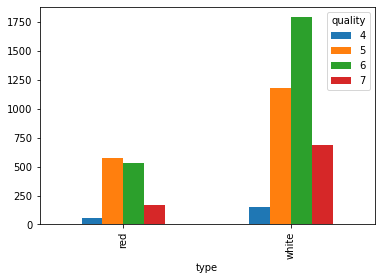

In [18]:
# for visualizing string data
# multiple bar plots
pd.crosstab(data.type,data.quality).plot(kind='bar')

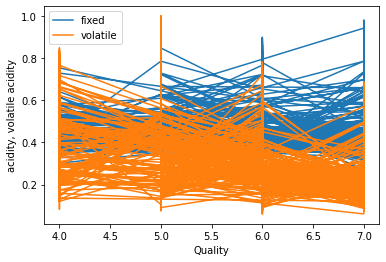

In [19]:
# line graph
plt.plot(data.quality, X["fixed acidity"])
plt.plot(data.quality, X["volatile acidity"])
plt.xlabel("Quality")
plt.ylabel("acidity, volatile acidity")
plt.legend(["fixed", "volatile"])

In [20]:
qlty_4 = data.groupby('quality').size()[4]
qlty_5 = data.groupby('quality').size()[5]
qlty_6 = data.groupby('quality').size()[6]
qlty_7 = data.groupby('quality').size()[7]

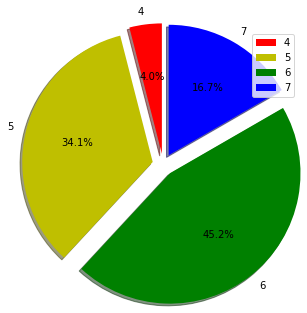

In [21]:
plt.figure(figsize=(18,5))
sub = ['4', '5', '6', '7']
 
slices = [qlty_4, qlty_5, qlty_6, qlty_7]
colors = ['r', 'y', 'g', 'b']
 
plt.pie(slices, labels = sub, colors=colors,
startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1), radius = 1.2, autopct = '%1.1f%%')
 
plt.legend()
plt.show()

In [22]:
data.groupby(['quality', 'red']).size()

quality  red
4        0       153
         1        53
5        0      1177
         1       576
6        0      1791
         1       534
7        0       690
         1       167
dtype: int64

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='pH'>

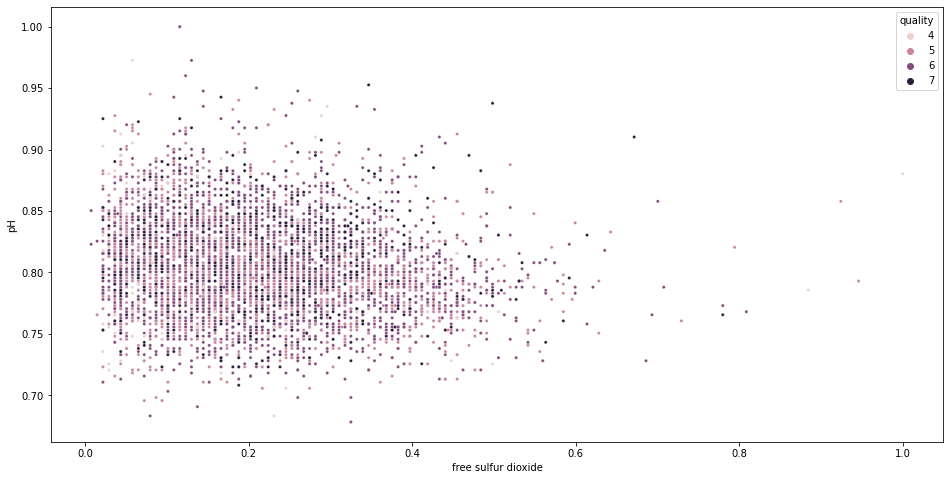

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = X["free sulfur dioxide"],  y = X.pH, hue=Y, s = 10 )

# 3.1 Primary Model 1: Logistic Regression

In [24]:
# spliting data for training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state = 42)

75% of our data will be use for training and remaining 25% data will be for testing.

Random state will genarate new random value for train and test data every time we run the code(in default mode). 
But if we assign fixed value for it, it will always create same train and test dataset.

For getting better accuracy and prediction we can change train-test size and random state value.

In [25]:
# importing require library for regression analysis
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                           max_iter=20000, multi_class='multinomial', n_jobs=1, penalty='l2', random_state=None, 
                           solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
# fit_intercept = False (doesnot calculate intercept while creating model). We use it when data is centralized 
# n_jobs=-1 for using all processer

For multi class classification we use multinomial for multi_class and "lbfgs" for solver. lbfgs solver has the best scalability than other solver:'sag' , 'saga'. 

Increasing max iteration will help in getting more nearly prediction but using very high iteration also mightnot be right option.

In [26]:
# fitting our training dataset into regression model
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000, multi_class='multinomial', n_jobs=1)

In [27]:
# predicting the quality of wine with testing data
y_predict = model.predict(X_test)
y_predict[:10]

array([6, 6, 6, 5, 6, 6, 6, 6, 7, 6], dtype=int64)

In [28]:
y_test[:10]

4043    6
4093    6
5751    6
2244    4
785     5
5595    6
2310    6
897     6
6167    7
6239    5
Name: quality, dtype: int64

In [29]:
# for getting accuracy of our model
l_score=model.score(X_test, y_test)
l_score

0.564625850340136

In [30]:
# Evaluatinon of our classifier 
# confusion matrix is used to describe the performance of a classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[  0,  25,  14,   0],
       [  0, 202, 154,   1],
       [  0,  99, 360,   6],
       [  0,   9, 140,  19]], dtype=int64)

In [31]:
frame = pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['pred[4]','pred[5]','pred[6]','pred[7]'])
frame
# we have actual values at rows and predicted values at column

pred[4]  pred[5]  pred[6]  pred[7]
0        0       25       14        0
1        0      202      154        1
2        0       99      360        6
3        0        9      140       19

In [32]:
# classification report gives the overall report of our classifier
from sklearn.metrics import classification_report
classifier = classification_report(y_test, y_predict)
print(classifier)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        39
           5       0.60      0.57      0.58       357
           6       0.54      0.77      0.64       465
           7       0.73      0.11      0.20       168

    accuracy                           0.56      1029
   macro avg       0.47      0.36      0.35      1029
weighted avg       0.57      0.56      0.52      1029



# 3.2 Primary Model 2 KNeighbors Classifier

In [33]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [34]:
# predicting the quality of wine with testing data
y_pred = classifier.predict(X_test)
y_pred[:10]

array([6, 7, 6, 5, 7, 6, 5, 6, 7, 5], dtype=int64)

In [35]:
# for getting accuracy of our model
k_score = classifier.score(X_test, y_test)
k_score

0.532555879494655

In [36]:
# Evaluatinon of our classifier 
# confusion matrix is used to describe the performance of a classifier
confusion_matrix(y_test, y_pred)

array([[  3,  24,  12,   0],
       [  5, 227, 115,  10],
       [  4, 152, 260,  49],
       [  1,  24,  85,  58]], dtype=int64)

In [37]:
frame = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred[4]','pred[5]','pred[6]','pred[7]'])
frame
# we have actual values at rows and predicted values at column

pred[4]  pred[5]  pred[6]  pred[7]
0        3       24       12        0
1        5      227      115       10
2        4      152      260       49
3        1       24       85       58

In [38]:
# classification report gives the overall report of our classifier
from sklearn.metrics import classification_report
mat = classification_report(y_test, y_pred)
print(mat)

              precision    recall  f1-score   support

           4       0.23      0.08      0.12        39
           5       0.53      0.64      0.58       357
           6       0.55      0.56      0.55       465
           7       0.50      0.35      0.41       168

    accuracy                           0.53      1029
   macro avg       0.45      0.40      0.41      1029
weighted avg       0.52      0.53      0.52      1029



# 4. Identifying hyper parameter by GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [40]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [41]:
# Mean cross-validated score of the best_estimator
knn_cv.best_score_

0.5710142999470811

In [42]:
# Parameter setting that gave the best results on the hold out data
n_nebor = knn_cv.best_params_
n_nebor

{'n_neighbors': 21}

# 5. Feature selection using filter method

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k=12)
fit = best_features.fit(X, Y) 
select_kbest = best_features.fit_transform(X, Y)

In [44]:
select_kbest.dtype

dtype('float64')

In [45]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] 
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores

Features     Scores
0          fixed acidity   0.338751
1       volatile acidity  24.916112
2            citric acid   2.075136
3         residual sugar   3.709159
4              chlorides   8.028713
5    free sulfur dioxide   5.025401
6   total sulfur dioxide   3.925797
7                density   0.004874
8                     pH   0.033026
9              sulphates   0.379534
10               alcohol  10.419953
11                   red  54.158555
12                 white  18.900782

In [46]:
best_features = []

for index, row in features_scores.iterrows():
    if row["Scores"] > 1:
        best_features.append(row["Features"])

In [47]:
best_features

['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'alcohol',
 'red',
 'white']

In [48]:
new_X = X.loc[:, best_features]

In [49]:
new_X.shape

(5141, 9)

In [50]:
Y.shape

(5141,)

# 6. Final model

In [51]:
# spliting data for training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, Y, train_size=0.8, random_state = 42)

## 6.1 KNeighborsClassifier

In [52]:
newClassifier= KNeighborsClassifier(n_neighbors=21, metric='minkowski', p=2 )  
newClassifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=21)

In [53]:
# predicting the quality of wine with testing data
y_pred = newClassifier.predict(X_test)
y_pred[:10]

array([6, 7, 6, 5, 6, 7, 5, 6, 7, 5], dtype=int64)

In [54]:
# for getting accuracy of our model
nk_score = newClassifier.score(X_test, y_test)
nk_score

0.5471331389698737

In [55]:
# classification report gives the overall report of our classifier
matr = classification_report(y_test, y_pred)
print(matr)

              precision    recall  f1-score   support

           4       0.50      0.03      0.05        39
           5       0.59      0.58      0.59       357
           6       0.54      0.66      0.59       465
           7       0.46      0.29      0.36       168

    accuracy                           0.55      1029
   macro avg       0.52      0.39      0.40      1029
weighted avg       0.54      0.55      0.53      1029



## 6.2 Logistic Regression

In [56]:
# importing require library for regression analysis
from sklearn.linear_model import LogisticRegression
newModel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                           max_iter=20000, multi_class='multinomial', n_jobs=1, penalty='l2', random_state=None, 
                           solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [57]:
# fitting our training dataset into regression model
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000, multi_class='multinomial', n_jobs=1)

In [58]:
# predicting the quality of wine with testing data
y_predict = model.predict(X_test)
y_predict[:10]

array([6, 6, 5, 5, 6, 6, 6, 6, 6, 5], dtype=int64)

In [59]:
# for getting accuracy of our model
nl_score = model.score(X_test, y_test)
nl_score

0.5549076773566569

In [60]:
# classification report gives the overall report of our classifier
from sklearn.metrics import classification_report
classifier = classification_report(y_test, y_predict)
print(classifier)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        39
           5       0.60      0.56      0.58       357
           6       0.53      0.77      0.63       465
           7       0.71      0.09      0.16       168

    accuracy                           0.55      1029
   macro avg       0.46      0.35      0.34      1029
weighted avg       0.56      0.55      0.51      1029



# 7. Conclusion

In [61]:
print(f"{l_score} and {nl_score}")
print(f"{k_score} and {nk_score}")

0.564625850340136 and 0.5549076773566569
0.532555879494655 and 0.5471331389698737


### Module score of logistic regression decrease by 1 percentage
### Module accuracy of K Neighbours Classifier increases 1 percentage